Exercices sur la fonction logistique x(i+1) = k\*x(i)\*(1-x(i))

2018-03-23   PV     L'environnement Jupyter devient quasiment inutilisable dans firefox quand un graphique est affiché, mais apparemment pas de problème avec Chrome

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='svg'

In [50]:
# Première version simple
def logis(k, skip=50, iter=50):
    x = 0.1
    res = []
    for i in range(skip):
        x = k*x*(1-x)
    for i in range(iter):
        x = k*x*(1-x)
        res.append(x)
    return res

X = np.linspace(3.4,3.6,500)
Y = []
#plt.figure(figsize=(10,6))
#for x in X:
#    Y.append(logis(x))
#_ = plt.plot(X,Y,'bo',markersize=0.1)

In [54]:
# Deuxième version de la foncton logistique
# Attend que la fonction soit devenu stable avant de capturer des points
# La fonction est stable si on retrouve une valeur déjà trouvée à epsilon près, 
# ou qu'on a effectué maxprep itérations
# Une fois qu'on a atteint le mode périodique, on capture maxloop valeurs ou jusqu'à
# ce qu'on retombe sur une valeur à epsilon près.
# Le tracé est plus joli puisque on dessine un ensemble stable
def l2(k):
    maxprep = 100
    maxloop = 350
    epsilon = 0.0001
    x = 0.5
    res = np.full(maxprep, 0.0)
    for i in range(maxprep):
        res[i] = x
        x = k*x*(1-x)
        if min(np.abs(res-x))<epsilon: break
    res = np.full(maxloop, 0.0)
    for i in range(maxloop):
        res[i] = x
        x = k*x*(1-x)
        if min(np.abs(res-x))<epsilon: break
    i = res
    return res[np.nonzero(res)]

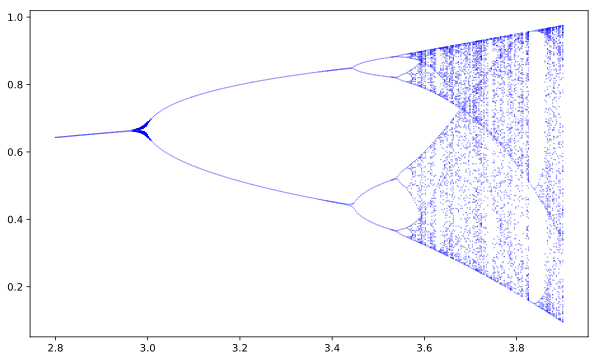

In [57]:
X = np.linspace(2.8,3.9,400)
Y = []
plt.figure(figsize=(10,6))
for x in X:
    plt.plot([x], [l2(x)], 'bo', markersize=0.2)